In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
#KNN Knearest Neighbour Regression

In [2]:
data = pd.read_csv("D://Topmentor Assignment and Project//bangalore house price prediction OHE-data.csv")

In [69]:
data.head()

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
0   2.0      2.0   47.0          1154.0    2     4072.790295   
1   2.0      2.0   60.0          1216.0    2     4934.210526   
2   2.0      1.0   65.0          1198.0    2     5425.709516   
3   4.0      2.0  325.0          2900.0    4    11206.896552   
4   3.0      2.0   60.0          1685.0    3     3560.830861   

   area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
0                              1                        0   
1                              0                        1   
2                              0                        1   
3                              1                        0   
4                              1                        0   

   area_typePlot  Area  availability_Ready To Move  ...  \
0                    0                           1  ...   
1                    0                           1  ...   
2                    0                           1  ...   
3                    0                           1  ...   
4                    0                           1  ...   

   location_Kalena Agrahara  location_Horamavu Agara  location_Vidyaranyapura  \
0                         0                        0                        0   
1                         0                        0                        0   
2                         0                        0                        0   
3                         0                        0                        0   
4                         0                        0                        0   

   location_BTM 2nd Stage  location_Hebbal Kempapura  location_Hosur Road  \
0                       0                          0                    0   
1                       0                          0                    0   
2                       0                          0                    0   
3                       0                          0                    0   
4                       0                          0                    0   

   location_Horamavu Banaswadi  location_Domlur  location_Mahadevpura  \
0                            0                0                     0   
1                            0                0                     0   
2                            0                0                     0   
3                            0                0                     0   
4                            0                0                     0   

   location_Tumkur Road  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 108 columns]

In [ ]:
#KNN for regression and classification for smaller data set

In [70]:
data.isnull().sum()

bath                           0
balcony                        0
price                          0
total_sqft_int                 0
bhk                            0
                              ..
location_Hosur Road            0
location_Horamavu Banaswadi    0
location_Domlur                0
location_Mahadevpura           0
location_Tumkur Road           0
Length: 108, dtype: int64

In [71]:
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [72]:
X = data.drop('price', axis=1)
y = data['price']

In [73]:
X

bath  balcony  total_sqft_int  bhk  price_per_sqft  \
0      1.0      1.0           540.0    1     6666.666667   
1      2.0      2.0           725.0    2     4965.517241   
2      2.0      1.0          1070.0    2     3271.028037   
3      2.0      0.0          1260.0    2     5650.396825   
4      2.0      2.0          1240.0    2     3800.000000   
...    ...      ...             ...  ...             ...   
7115   2.0      1.0          1200.0    2     6250.000000   
7116   3.0      3.0          1750.0    3     8514.285714   
7117   3.0      2.0          1600.0    3     5125.000000   
7118   2.0      2.0          1052.0    2     4847.908745   
7119   2.0      2.0          1198.0    2     4841.402337   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
0                                 0                        1   
1                                 1                        0   
2                                 0                        1   
3                                 1                        0   
4                                 1                        0   
...                             ...                      ...   
7115                              0                        1   
7116                              0                        1   
7117                              1                        0   
7118                              1                        0   
7119                              1                        0   

      area_typePlot  Area  availability_Ready To Move  location_Whitefield  \
0                       0                           1                    0   
1                       0                           1                    0   
2                       0                           1                    0   
3                       0                           1                    0   
4                       0                           1                    0   
...                   ...                         ...                  ...   
7115                    0                           1                    0   
7116                    0                           1                    0   
7117                    0                           0                    1   
7118                    0                           1                    0   
7119                    0                           1                    0   

      ...  location_Kalena Agrahara  location_Horamavu Agara  \
0     ...                         0                        0   
1     ...                         0                        0   
2     ...                         0                        0   
3     ...                         0                        0   
4     ...                         0                        0   
...   ...                       ...                      ...   
7115  ...                         0                        0   
7116  ...                         0                        0   
7117  ...                         0                        0   
7118  ...                         0                        0   
7119  ...                         0                        0   

      location_Vidyaranyapura  location_BTM 2nd Stage  \
0                           0                       0   
1                           0                       0   
2                           0                       0   
3                           0                       0   
4                           0                       0   
...                       ...                     ...   
7115                        0                       0   
7116                        0                       0   
7117                        0                       0   
7118                        0                       0   
7119                        0                       0   

      location_Hebbal Kempapura  location_Hosur Road  \
0                             0                    0   
1            

In [74]:
y

0        36.000
1        36.000
2        35.000
3        71.195
4        47.120
         ...   
7115     75.000
7116    149.000
7117     82.000
7118     51.000
7119     58.000
Name: price, Length: 7120, dtype: float64

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state =12345)

In [77]:
X_train.shape, y_train.shape

((4984, 107), (4984,))

In [78]:
X_test.shape, y_test.shape

((2136, 107), (2136,))

In [79]:
data.shape

(7120, 108)

In [80]:
X_train.head(2)

bath  balcony  total_sqft_int  bhk  price_per_sqft  \
1949   2.0      1.0          1050.0    2     6190.476190   
4218   2.0      2.0           890.0    2     5056.179775   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
1949                              1                        0   
4218                              0                        1   

      area_typePlot  Area  availability_Ready To Move  location_Whitefield  \
1949                    0                           1                    0   
4218                    0                           1                    0   

      ...  location_Kalena Agrahara  location_Horamavu Agara  \
1949  ...                         0                        0   
4218  ...                         0                        0   

      location_Vidyaranyapura  location_BTM 2nd Stage  \
1949                        0                       0   
4218                        0                       0   

      location_Hebbal Kempapura  location_Hosur Road  \
1949                          0                    0   
4218                          0                    0   

      location_Horamavu Banaswadi  location_Domlur  location_Mahadevpura  \
1949                            0                0                     0   
4218                            0                0                     0   

      location_Tumkur Road  
1949                     0  
4218                     0  

[2 rows x 107 columns]

In [81]:
y_train.head()

1949     65.0
4218     45.0
1956     78.0
706      97.0
2294    100.0
Name: price, dtype: float64

In [92]:
y_test.head(2)

3978     75.0
4645    680.0
Name: price, dtype: float64

In [119]:
%time
knn_model = KNeighborsRegressor(n_neighbors=2) #by default 5
knn_model_train = knn_model.fit(X_train, y_train)
print("Training completed")

CPU times: total: 0 ns
Wall time: 9.54 μs
Training completed


In [120]:
knn_model_train.score(X_train, y_train)# coeffient of determination

0.9857713862541359

In [121]:
#selection of number of neighbours
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [122]:
sqrt(len(data))# selection of number of neighbors here 84 are neighbors

84.38009243891595

In [ ]:
## Training error to select the k

In [123]:
error =[]
for i in range(1,84):
    knn_model = KNeighborsRegressor(n_neighbors=i)
    knn_model_train = knn_model.fit(X_train, y_train)
    err = 1 -knn_model_train.score(X_train, y_train)
    error.append(err)

In [124]:
error

[0.0,
 0.01422861374586415,
 0.03490001739913473,
 0.046268347695004985,
 0.06632269190041407,
 0.08143261437933602,
 0.0975850227071644,
 0.1094665683178131,
 0.11494994441054573,
 0.12440764668128879,
 0.13867515735909008,
 0.14890102339127131,
 0.1557196059386884,
 0.16559164877542343,
 0.17077801582502994,
 0.17735099891369088,
 0.18106429055361306,
 0.18213101093600137,
 0.18256438091702198,
 0.18957363129393023,
 0.19472423114494275,
 0.1979438408133244,
 0.20279013194176465,
 0.20687416086951482,
 0.21179002950118342,
 0.21478223426703213,
 0.21864945702018834,
 0.22212869291832715,
 0.2255641690692185,
 0.2272151858383441,
 0.23032370507470112,
 0.23376251162655615,
 0.2366101212756635,
 0.23993350922031986,
 0.24411782474294297,
 0.24693139369646921,
 0.24954244366244793,
 0.25273435370801,
 0.2550331159937371,
 0.2579710250445397,
 0.26072584912751817,
 0.2637520786797738,
 0.2666567863270757,
 0.269537858093323,
 0.27276292252670997,
 0.27554956944167297,
 0.2781399037137017

In [126]:
training_k = pd.DataFrame({'Neighbour': range(1,84), 'error': error})

In [127]:
training_k

Neighbour     error
0           1  0.000000
1           2  0.014229
2           3  0.034900
3           4  0.046268
4           5  0.066323
..        ...       ...
78         79  0.335979
79         80  0.337425
80         81  0.339137
81         82  0.340562
82         83  0.341948

[83 rows x 2 columns]

In [128]:
import seaborn as sns

<Axes: xlabel='Neighbour', ylabel='error'>

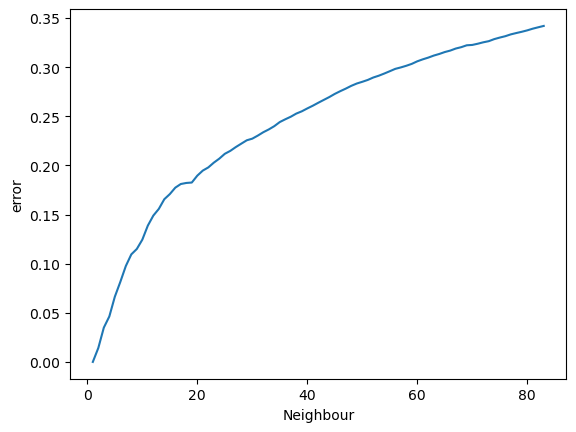

In [129]:
sns.lineplot(data= training_k, x = 'Neighbour', y = 'error')

In [130]:
min_err = training_k['error'].min
min_err

<bound method Series.min of 0     0.000000
1     0.014229
2     0.034900
3     0.046268
4     0.066323
        ...   
78    0.335979
79    0.337425
80    0.339137
81    0.340562
82    0.341948
Name: error, Length: 83, dtype: float64>

In [131]:
y_pred = knn_model_train.predict(X_test)
y_pred

array([ 73.16283133, 422.97590361, 120.74698795, ..., 362.12289157,
        39.74644578,  33.20662651])

In [109]:
error_val = []
for i in range(1, 84):
    knn_model = KNeighborsRegressor(n_neighbors = i)
    knn_model_train = knn_model.fit(X_train, y_train)
    pred = knn_model.predict(X_test)
    err = 1 - r2_score(y_test, pred)
    error_val.append(err)

In [132]:
validation_k = pd.DataFrame({'Neighbour':range(1,84), 'error': error_val})
validation_k.sort_values('error')# neighbours 2 has min error most optimize model 

Neighbour     error
1           2  0.091934
2           3  0.098050
3           4  0.100561
4           5  0.126797
0           1  0.130323
..        ...       ...
78         79  0.392683
79         80  0.394347
80         81  0.395730
81         82  0.397654
82         83  0.399332

[83 rows x 2 columns]

<Axes: xlabel='Neighbour', ylabel='error'>

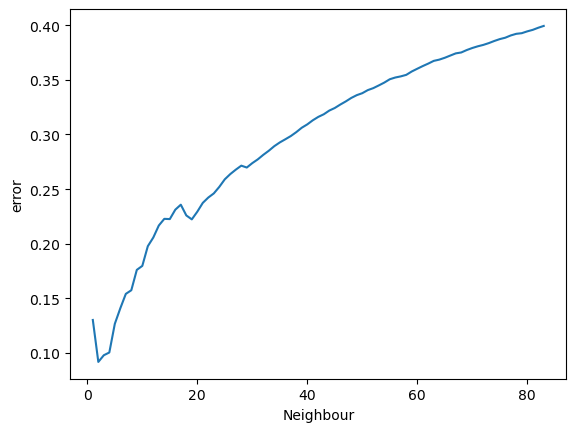

In [133]:
sns.lineplot(data = validation_k, x = 'Neighbour', y = 'error')

In [ ]:
# at point 2 neighbour validation point its given good score 
# neighbour 2 has min error which gives most optimize result

In [ ]:
print("Final Conclusion:" "The most optimal neighbour point is K =2, because it gives the lowest validation error(0.098050)")
print("Beyond this point, the error increases due to underfitting, making k = 2 the most optimized")
